<a href="https://colab.research.google.com/github/tung1803/AI/blob/main/10MonAn_VN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

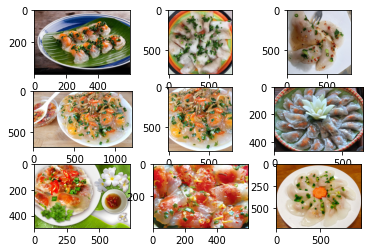

In [30]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder= '/content/drive/MyDrive/data/MonAn_VN/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder+'BanhBotLoc.'+str(i+1)+'.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [31]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder = '/content/drive/MyDrive/data/MonAn_VN/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('BanhBotLoc'):
    output = 0
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('BanhChung'):
    output = 1
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('BanhDay'):
    output = 2
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('BanhMi'):
    output = 3
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('BanhXeo'):
    output = 4
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('BunDauMamTom'):
    output = 5
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('ComTam'):
    output = 6
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Nem'):
    output = 7
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Pho'):
    output = 8
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('XoiGa'):
    output = 9
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('10foods_photos.npy', photos)
save('10foods_labels.npy', labels)

(90, 200, 200, 3) (90,)


In [32]:
# Model CNN
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi

model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
history = model.fit(photos, labels, epochs=15, verbose=1)

Epoch 1/15
3/3 [==============================] - 6s 2s/step - loss: 1483.6106 - accuracy: 0.1333
Epoch 2/15
3/3 [==============================] - 5s 2s/step - loss: 1164.5605 - accuracy: 0.1444
Epoch 3/15
3/3 [==============================] - 5s 2s/step - loss: 307.1889 - accuracy: 0.1444
Epoch 4/15
3/3 [==============================] - 5s 2s/step - loss: 31.2977 - accuracy: 0.4111
Epoch 5/15
3/3 [==============================] - 5s 2s/step - loss: 1.0409 - accuracy: 0.7556
Epoch 6/15
3/3 [==============================] - 5s 2s/step - loss: 0.0583 - accuracy: 0.9889
Epoch 7/15
3/3 [==============================] - 5s 2s/step - loss: 0.0190 - accuracy: 1.0000
Epoch 8/15
3/3 [==============================] - 7s 2s/step - loss: 0.0086 - accuracy: 1.0000
Epoch 9/15
3/3 [==============================] - 5s 2s/step - loss: 0.0024 - accuracy: 1.0000
Epoch 10/15
3/3 [==============================] - 5s 2s/step - loss: 0.0017 - accuracy: 1.0000
Epoch 11/15
3/3 [=======================

In [34]:
model.evaluate(photos,labels)

3/3 [==============================] - 1s 404ms/step - loss: 4.9008e-08 - accuracy: 1.0000


[4.900821437558989e-08, 1.0]

In [35]:
model.save('10Foods_Final.h5')

In [36]:
from keras.models import load_model
models=load_model('10Foods_Final.h5')

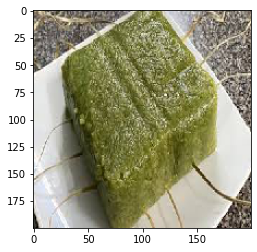

In [38]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('BanhChung.7.jpg', target_size=(200,200))
plt.imshow(img)

In [39]:
import numpy as np
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes

[[0.08957351 0.12231001 0.09999443 0.10546185 0.09245471 0.10592448
  0.0835182  0.09217045 0.10216094 0.1064314 ]]


[1]